In [1]:
!which python

/data/gpfs/assoc/parchmanlab/tfaske/anaconda3/envs/py36/bin/python


In [2]:
#!source activate py34
!source activate py36

/usr/bin/sh: line 0: source: activate: file not found


In [4]:
import sys

#sys.path.append('/home/faske/g/anaconda3/envs/py34/lib/python3.4/site-packages')
sys.path.append('/data/gpfs/assoc/parchmanlab/tfaske/anaconda3/envs/py36/lib/python3.6/site-packages')
sys.path.append("/data/gpfs/assoc/parchmanlab/tfaske/ipynb/include_utils")

import ipyparallel as ipp
import os, time
import include_utils as u
import pandas as pd
import numpy as np
import scipy as sp
import numbers
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib.colors as mcolors
#import vcf
from sklearn import preprocessing
from subprocess import Popen, PIPE, call, check_output
import seaborn as sns
from IPython.display import FileLink
import urllib.request as urllib2
import dill
import traceback
from pandas import Series, DataFrame
import gzip
import warnings
warnings.filterwarnings('ignore',category=pd.io.pytables.PerformanceWarning)
%config InlineBackend.figure_format = 'retina'
from Bio import SeqIO
#import pysam
from collections import OrderedDict, namedtuple, Counter
import operator
import multiprocessing as mp
import shutil
import tempfile
#from ipyparallel import Client
import scandir
import glob
from Bio.SeqIO.QualityIO import FastqGeneralIterator
import pickle
import re
from itertools import chain
#import Levenshtein as lv

In [5]:
vcfutils = "vcfutils.pl"
vcftools = "vcftools"
bcftools = "bcftools"
bgzip = "bgzip"
tabix = "tabix"
java = "java"
plink = "plink --noweb"

In [6]:
root = '/data/gpfs/home/tfaske/d/rabbruh/SNPcall'

In [7]:
cd $root

/data/gpfs/assoc/denovo/tfaske/rabbruh/SNPcall


In [8]:
!mkdir filtering

In [9]:
!cp 'samtools1-9.rabbruh.vcf.gz' filtering

In [12]:
analysis_dir = '/data/gpfs/home/tfaske/d/rabbruh/SNPcall/filtering'

In [13]:
cd $analysis_dir

/data/gpfs/assoc/denovo/tfaske/rabbruh/SNPcall/filtering


In [15]:
vcf_file = os.path.join(analysis_dir, "samtools1-9.rabbruh.vcf.gz")
assert os.path.exists(vcf_file)
vcf_file

'/data/gpfs/home/tfaske/d/rabbruh/SNPcall/filtering/samtools1-9.rabbruh.vcf.gz'

# Filter first round 
    missing data, MAF, biallelic

In [16]:
!$vcftools --remove-indels \
--max-missing 0.5 \
--min-alleles 2 \
--max-alleles 2 \
--maf 0.01 \
--thin 5 \
--remove-filtered-all \
--recode \
--recode-INFO-all \
--gzvcf \
$vcf_file \
--out $'rabbruh_miss50_thin5_MAF1'


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/rabbruh/SNPcall/filtering/samtools1-9.rabbruh.vcf.gz
	--recode-INFO-all
	--maf 0.01
	--max-alleles 2
	--min-alleles 2
	--thin 5
	--max-missing 0.5
	--out rabbruh_miss50_thin5_MAF1
	--recode
	--remove-filtered-all
	--remove-indels

Using zlib version: 1.2.11
After filtering, kept 384 out of 384 Individuals
Outputting VCF file...
After filtering, kept 474645 out of a possible 1943163 Sites
Run Time = 856.00 seconds


In [17]:
!$vcftools --remove-indels \
--max-missing 0.7 \
--min-alleles 2 \
--max-alleles 2 \
--maf 0.01 \
--thin 5 \
--remove-filtered-all \
--recode \
--recode-INFO-all \
--gzvcf \
$vcf_file \
--out $'rabbruh_miss70_thin5_MAF1'


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/rabbruh/SNPcall/filtering/samtools1-9.rabbruh.vcf.gz
	--recode-INFO-all
	--maf 0.01
	--max-alleles 2
	--min-alleles 2
	--thin 5
	--max-missing 0.7
	--out rabbruh_miss70_thin5_MAF1
	--recode
	--remove-filtered-all
	--remove-indels

Using zlib version: 1.2.11
After filtering, kept 384 out of 384 Individuals
Outputting VCF file...
After filtering, kept 323629 out of a possible 1943163 Sites
Run Time = 653.00 seconds


In [18]:
!$vcftools --remove-indels \
--max-missing 0.7 \
--min-alleles 2 \
--max-alleles 2 \
--maf 0.01 \
--thin 50 \
--remove-filtered-all \
--recode \
--recode-INFO-all \
--gzvcf \
$vcf_file \
--out $'rabbruh_miss70_thin50_MAF1'


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/rabbruh/SNPcall/filtering/samtools1-9.rabbruh.vcf.gz
	--recode-INFO-all
	--maf 0.01
	--max-alleles 2
	--min-alleles 2
	--thin 50
	--max-missing 0.7
	--out rabbruh_miss70_thin50_MAF1
	--recode
	--remove-filtered-all
	--remove-indels

Using zlib version: 1.2.11
After filtering, kept 384 out of 384 Individuals
Outputting VCF file...
After filtering, kept 99429 out of a possible 1943163 Sites
Run Time = 380.00 seconds


In [19]:
!$vcftools --remove-indels \
--max-missing 0.7 \
--min-alleles 2 \
--max-alleles 2 \
--maf 0.02 \
--thin 100 \
--remove-filtered-all \
--recode \
--recode-INFO-all \
--gzvcf \
$vcf_file \
--out $'rabbruh_miss70_thin100_MAF2'


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/rabbruh/SNPcall/filtering/samtools1-9.rabbruh.vcf.gz
	--recode-INFO-all
	--maf 0.02
	--max-alleles 2
	--min-alleles 2
	--thin 100
	--max-missing 0.7
	--out rabbruh_miss70_thin100_MAF2
	--recode
	--remove-filtered-all
	--remove-indels

Using zlib version: 1.2.11
After filtering, kept 384 out of 384 Individuals
Outputting VCF file...
After filtering, kept 61708 out of a possible 1943163 Sites
Run Time = 285.00 seconds


In [20]:
!$vcftools --remove-indels \
--max-missing 0.7 \
--min-alleles 2 \
--max-alleles 2 \
--maf 0.05 \
--thin 100 \
--remove-filtered-all \
--recode \
--recode-INFO-all \
--gzvcf \
$vcf_file \
--out $'rabbruh_miss70_thin100_MAF5'


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/rabbruh/SNPcall/filtering/samtools1-9.rabbruh.vcf.gz
	--recode-INFO-all
	--maf 0.05
	--max-alleles 2
	--min-alleles 2
	--thin 100
	--max-missing 0.7
	--out rabbruh_miss70_thin100_MAF5
	--recode
	--remove-filtered-all
	--remove-indels

Using zlib version: 1.2.11
After filtering, kept 384 out of 384 Individuals
Outputting VCF file...
After filtering, kept 56062 out of a possible 1943163 Sites
Run Time = 273.00 seconds


In [21]:
vcf_filtered = "%s.recode.vcf" % '/data/gpfs/home/tfaske/d/rabbruh/SNPcall/filtering/rabbruh_miss70_thin100_MAF5'
vcf_filtered_gz = "%s.gz" % vcf_filtered

In [22]:
!$bgzip -c $vcf_filtered > {vcf_filtered_gz}
!$tabix {vcf_filtered_gz}

# Remove bad_indv


In [23]:
!$vcftools --gzvcf $vcf_filtered_gz --out $vcf_filtered_gz --missing-indv


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/rabbruh/SNPcall/filtering/rabbruh_miss70_thin100_MAF5.recode.vcf.gz
	--missing-indv
	--out /data/gpfs/home/tfaske/d/rabbruh/SNPcall/filtering/rabbruh_miss70_thin100_MAF5.recode.vcf.gz

Using zlib version: 1.2.11
After filtering, kept 384 out of 384 Individuals
Outputting Individual Missingness
After filtering, kept 56062 out of a possible 56062 Sites
Run Time = 7.00 seconds


In [24]:
def get_imiss(filedir, prefix):
    imiss_file = !ls {filedir}/{prefix}.imiss
    imiss_df = pd.read_csv(imiss_file[0], sep="\t")
    imiss_df.index = imiss_df.INDV
    return imiss_df

In [25]:
imiss_df = get_imiss(analysis_dir,'rabbruh_miss70_thin100_MAF5.recode.vcf.gz')
imiss_df.head()

,INDV,N_DATA,N_GENOTYPES_FILTERED,N_MISS,F_MISS
INDV,,,,,
EN_TF_100,EN_TF_100,56062,0,4061,0.072438
EN_TF_101,EN_TF_101,56062,0,2110,0.037637
EN_TF_102,EN_TF_102,56062,0,2289,0.040830
EN_TF_103,EN_TF_103,56062,0,3667,0.065410
EN_TF_104,EN_TF_104,56062,0,3043,0.054279


In [26]:
imiss_df.F_MISS.describe()

count    384.000000
mean       0.176001
std        0.221610
min        0.010774
25%        0.039862
50%        0.074712
75%        0.200274
max        0.982751
Name: F_MISS, dtype: float64

In [31]:
len(imiss_df),len(imiss_df[imiss_df.F_MISS >= .8]),len(imiss_df[imiss_df.F_MISS >= .75]), len(imiss_df[imiss_df.F_MISS >= .70])


(384, 12, 17, 19)

In [32]:
bad_indv = imiss_df.INDV[imiss_df.F_MISS >= .70]

In [33]:
with open(os.path.join(analysis_dir, "bad_indv.txt"), "w") as o:
    o.write("INDV\n")
    for elem in bad_indv.index:
        o.write("%s\n" % elem)

In [34]:
!$vcftools --gzvcf $vcf_filtered_gz \
--remove-indels  \
--remove-filtered-all \
--recode \
--recode-INFO-all \
--remove {os.path.join(analysis_dir, "bad_indv.txt")} \
--out {os.path.join(analysis_dir, "snps_indv_removed")}


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/rabbruh/SNPcall/filtering/rabbruh_miss70_thin100_MAF5.recode.vcf.gz
	--remove /data/gpfs/home/tfaske/d/rabbruh/SNPcall/filtering/bad_indv.txt
	--recode-INFO-all
	--out /data/gpfs/home/tfaske/d/rabbruh/SNPcall/filtering/snps_indv_removed
	--recode
	--remove-filtered-all
	--remove-indels

Using zlib version: 1.2.11
Excluding individuals in 'exclude' list
After filtering, kept 365 out of 384 Individuals
Outputting VCF file...
After filtering, kept 56062 out of a possible 56062 Sites
Run Time = 82.00 seconds


In [35]:
vcf_bad_remove = os.path.join(analysis_dir, "snps_indv_removed.recode.vcf")
vcf_bad_remove_gz = vcf_bad_remove + ".gz"
!$bgzip -c {vcf_bad_remove} > {vcf_bad_remove_gz}
!$tabix {vcf_bad_remove_gz}

# Filter snps further 
this needs to be done after removing individuals


In [36]:
def get_vcf_stats(vcf_gz):
    
    stats = ['depth',
            'site-depth',
            'site-mean-depth',
            'site-quality',
            'missing-site',
            'freq',
            'counts',
            'hardy',
            'het']
    
    for stat in stats:
        !$vcftools --gzvcf $vcf_gz \
        --out $vcf_gz \
        {"--%s" % stat} 

In [37]:
get_vcf_stats(vcf_bad_remove_gz)


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/rabbruh/SNPcall/filtering/snps_indv_removed.recode.vcf.gz
	--depth
	--out /data/gpfs/home/tfaske/d/rabbruh/SNPcall/filtering/snps_indv_removed.recode.vcf.gz

Using zlib version: 1.2.11
After filtering, kept 365 out of 365 Individuals
Outputting Mean Depth by Individual
After filtering, kept 56062 out of a possible 56062 Sites
Run Time = 7.00 seconds

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/rabbruh/SNPcall/filtering/snps_indv_removed.recode.vcf.gz
	--out /data/gpfs/home/tfaske/d/rabbruh/SNPcall/filtering/snps_indv_removed.recode.vcf.gz
	--site-depth

Using zlib version: 1.2.11
After filtering, kept 365 out of 365 Individuals
Outputting Depth for Each Site
After filtering, kept 56062 out of a possible 56062 Sites
Run Time = 7.00 seconds

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marc

After filtering, kept 365 out of 365 Individuals
Outputting Individual Heterozygosity
After filtering, kept 56062 out of a possible 56062 Sites
Run Time = 6.00 seconds


In [38]:
#pd.set_option('display.max_columns', 100)

def get_MAF(row):
    try:
        return np.min([row.A1_freq, row.A2_freq])
    except:
        print(row)
        
def get_correction(n):
    #for finite sample size
    return (2*n)/(2*n-1)

def calculate_Fis(vals):
    try:
        data = [float(x) for x in vals.split("/")]
        assert len(data) == 3
        num_individuals = np.sum(data)
        total_alleles = 2*num_individuals
        a1_count = 2*data[0]
        a2_count = 2*data[2]
        het_count = data[1]
        a1_count += het_count
        a2_count += het_count
        a1_freq = a1_count/total_alleles
        a2_freq = a2_count/total_alleles
        assert a1_freq + a2_freq == 1.0
        He = 2 * a1_freq * a2_freq * get_correction(num_individuals)
        Ho = het_count/num_individuals
        Fis = 1 - (Ho/He)
        return Fis
    except:
        return -9

def combine_vcf_stats(filedir, prefix):
    
    hardy_files = !ls {filedir}/{prefix}.hwe
    hardy = pd.read_csv(hardy_files[0], sep="\t")

    hardy.columns = ['CHROM', 'POS', 'OBS(HOM1/HET/HOM2)', 'E(HOM1/HET/HOM2)', 'ChiSq_HWE',
       'P_HWE', 'P_HET_DEFICIT', 'P_HET_EXCESS']
    hardy.index = hardy.apply(lambda x: "%s-%d" % (x.CHROM, x.POS), axis=1)
    
    loci_files = !ls {filedir}/{prefix}.l* | grep -v log
    loci_df = pd.concat([pd.read_csv(x, sep="\t", skiprows=0) for x in loci_files], axis=1)
    chrom_pos = loci_df.ix[:,0:2]
    
    frq_files = !ls {filedir}/{prefix}.frq* | grep -v count
    frq_data = []
    h = open(frq_files[0])
    header = h.readline().strip().split()
    for line in h:
        frq_data.append(line.strip().split('\t'))

    header = ['CHROM', 'POS', 'N_ALLELES', 'N_CHR', 'A1_FREQ', "A2_FREQ"]
    frq_df = pd.DataFrame(frq_data)
    print(frq_df.columns)
    #frq_df = frq_df.drop([6,7],axis=1)
    frq_df.columns = header
    frq_df.index = frq_df.apply(lambda x: "%s-%s" % (x.CHROM, x.POS), axis=1)
    
    loci_df = loci_df.drop(['CHROM','CHR','POS'], axis=1)
    loci_df = pd.concat([chrom_pos, loci_df], axis=1)
    loci_df.index = loci_df.apply(lambda x: "%s-%d" % (x.CHROM, x.POS), axis=1)
    
    loci_df = pd.concat([loci_df, frq_df, hardy], axis=1)
    loci_df["A1_allele"] = loci_df.apply(lambda row: row.A1_FREQ.split(":")[0], axis=1)
    loci_df["A2_allele"] = loci_df.apply(lambda row: row.A2_FREQ.split(":")[0], axis=1)
    
    loci_df["A1_freq"] = loci_df.apply(lambda row: float(row.A1_FREQ.split(":")[1]), axis=1)
    loci_df["A2_freq"] = loci_df.apply(lambda row: float(row.A2_FREQ.split(":")[1]), axis=1)
    
    loci_df['MAF'] = loci_df.apply(get_MAF, axis=1)
    loci_df = loci_df.drop(['CHROM', 'POS'], axis=1)
    
    loci_df['Fis'] = loci_df['OBS(HOM1/HET/HOM2)'].apply(calculate_Fis)
    
    return loci_df, frq_df, hardy

In [39]:
vcf_bad_remove_gz

'/data/gpfs/home/tfaske/d/rabbruh/SNPcall/filtering/snps_indv_removed.recode.vcf.gz'

In [40]:
loci_df, frq_df, hardy = combine_vcf_stats(analysis_dir,'snps_indv_removed.recode.vcf.gz')

/data/gpfs/assoc/parchmanlab/tfaske/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:45: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/data/gpfs/assoc/parchmanlab/tfaske/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


RangeIndex(start=0, stop=6, step=1)


In [41]:
loci_out = os.path.join(analysis_dir,'loci_out.csv')
frq_out = os.path.join(analysis_dir,'frq_out.csv')
hardy_out = os.path.join(analysis_dir,'hardy_out.csv')

loci_df.to_csv(path_or_buf=loci_out)
frq_df.to_csv(path_or_buf=frq_out)
hardy.to_csv(path_or_buf=hardy_out)


In [42]:
loci_df.SUM_DEPTH.describe()

count    5.606200e+04
mean     8.061873e+03
std      4.481699e+04
min      7.850000e+02
25%      1.686000e+03
50%      2.475000e+03
75%      4.584000e+03
max      2.748921e+06
Name: SUM_DEPTH, dtype: float64

In [43]:
loci_df.QUAL.describe()

count    56062.000000
mean       972.793301
std        121.496788
min          3.652670
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: QUAL, dtype: float64

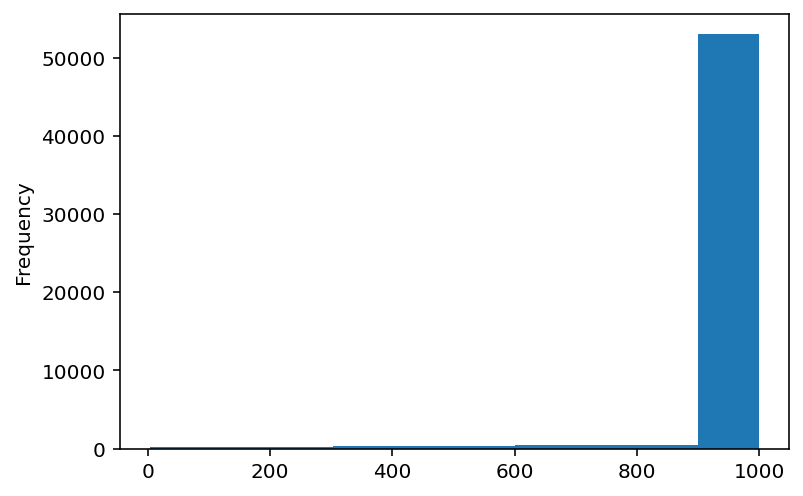

In [44]:
loci_df.QUAL.plot(kind="hist");

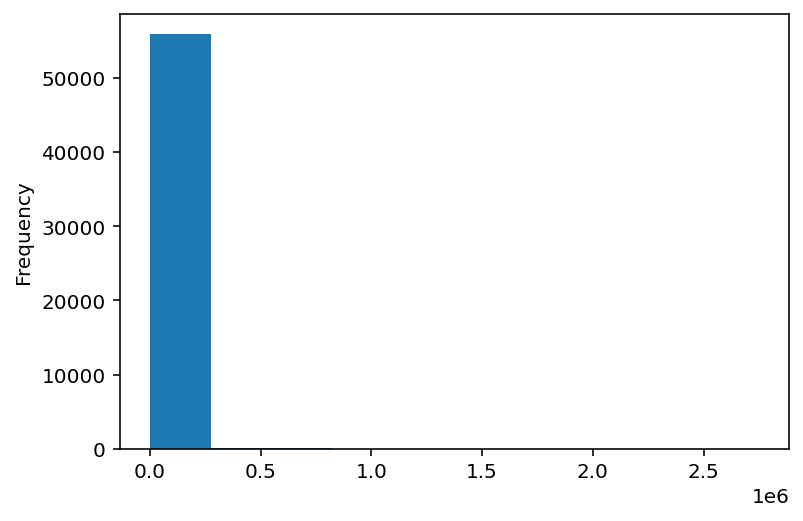

In [45]:
loci_df.SUM_DEPTH.plot(kind="hist");

In [46]:
len(loci_df[loci_df.Fis == -9])

0

In [49]:
len(loci_df[loci_df.SUM_DEPTH <5000]),len(loci_df[loci_df.SUM_DEPTH >=1500])

(43322, 46447)

In [50]:
len(loci_df[loci_df.QUAL >= 10]) - len(loci_df[loci_df.QUAL >= 20])

18

In [51]:
len(loci_df[loci_df.QUAL <  999]), len(loci_df[loci_df.QUAL < 500]), len(loci_df[loci_df.QUAL < 200])

(3689, 1274, 423)

In [53]:
 len(loci_df[loci_df.Fis <= -0.5]), len(loci_df[loci_df.MAF < 0.05])

(2442, 142)

In [54]:
def filter_snps(df, imputed=False):
    if imputed:
        return df[(df.MAF >= 0.01) &  
                  (df.Fis > -0.5)]
    else:
        return df[(df.SUM_DEPTH >= 1500) & 
                  (df.SUM_DEPTH < 5000) & 
                  (df.QUAL >= 999) & 
                  (df.MAF >= 0.05) &  
                  (df.Fis > -0.5)]

In [55]:
loci_stage1 = filter_snps(loci_df)
loci_stage1.shape

(30852, 25)

In [56]:
with open(os.path.join(analysis_dir, "stage1_positions.txt"), "w") as o:
    for elem in loci_stage1.index:
        o.write("%s\n" % "\t".join(elem.split("-")))

In [57]:
!$vcftools --gzvcf $vcf_bad_remove_gz \
--remove-indels  \
--remove-filtered-all \
--recode \
--recode-INFO-all \
--positions {os.path.join(analysis_dir, "stage1_positions.txt")} \
--out {os.path.join(analysis_dir, "good_snps")}


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/rabbruh/SNPcall/filtering/snps_indv_removed.recode.vcf.gz
	--recode-INFO-all
	--out /data/gpfs/home/tfaske/d/rabbruh/SNPcall/filtering/good_snps
	--positions /data/gpfs/home/tfaske/d/rabbruh/SNPcall/filtering/stage1_positions.txt
	--recode
	--remove-filtered-all
	--remove-indels

Using zlib version: 1.2.11
After filtering, kept 365 out of 365 Individuals
Outputting VCF file...
After filtering, kept 30852 out of a possible 56062 Sites
Run Time = 49.00 seconds


In [58]:
snps = os.path.join(analysis_dir, "good_snps.recode.vcf")
snps_gz = snps + ".gz"
!$bgzip -c {snps} > {snps_gz}
!$tabix {snps_gz}

# Plink / chrom_map

In [59]:
chroms = sorted(set([x.split("-")[0] for x in loci_df.index]))
len(chroms) # number of unique contigs

56062

In [60]:
with open(os.path.join(analysis_dir, "chrom_map.txt"), "w") as o:
    for i, c in enumerate(chroms):
        o.write("%s\t%d\n" % (c, i))

In [61]:
def write_plink_files(vcf_gz):
    !$vcftools --gzvcf {vcf_gz} \
    --out {vcf_gz} \
    --plink \
    --chrom-map {os.path.join(analysis_dir, "chrom_map.txt")}

In [62]:
write_plink_files(snps_gz)


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/rabbruh/SNPcall/filtering/good_snps.recode.vcf.gz
	--chrom-map /data/gpfs/home/tfaske/d/rabbruh/SNPcall/filtering/chrom_map.txt
	--out /data/gpfs/home/tfaske/d/rabbruh/SNPcall/filtering/good_snps.recode.vcf.gz
	--plink

Using zlib version: 1.2.11
After filtering, kept 365 out of 365 Individuals
Writing PLINK PED and MAP files ... 
	Read 56063 chromosome mapping file entries.
Done.
After filtering, kept 30852 out of a possible 30852 Sites
Run Time = 6.00 seconds


# Make 012

In [63]:
f = os.path.join(analysis_dir, "good_snps.recode.vcf")
!$vcftools --gzvcf {f} \
--out {f} \
--012


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/rabbruh/SNPcall/filtering/good_snps.recode.vcf
	--012
	--out /data/gpfs/home/tfaske/d/rabbruh/SNPcall/filtering/good_snps.recode.vcf

Using zlib version: 1.2.11
After filtering, kept 365 out of 365 Individuals
Writing 012 matrix files ... Done.
After filtering, kept 30852 out of a possible 30852 Sites
Run Time = 4.00 seconds


# Get coverage per individual

In [64]:
f = os.path.join(analysis_dir, "good_snps.recode.vcf")
!$vcftools --gzvcf {f} \
--out {f} \
--depth


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/rabbruh/SNPcall/filtering/good_snps.recode.vcf
	--depth
	--out /data/gpfs/home/tfaske/d/rabbruh/SNPcall/filtering/good_snps.recode.vcf

Using zlib version: 1.2.11
After filtering, kept 365 out of 365 Individuals
Outputting Mean Depth by Individual
After filtering, kept 30852 out of a possible 30852 Sites
Run Time = 3.00 seconds


In [65]:
depth_file = os.path.join(analysis_dir, "good_snps.recode.vcf.idepth")
depth_df = pd.read_csv(depth_file, sep="\t")
depth_df.head()

,INDV,N_SITES,MEAN_DEPTH
0,EN_TF_100,30852,6.82225
1,EN_TF_101,30852,10.61670
2,EN_TF_102,30852,11.30720
3,EN_TF_103,30852,10.19730
4,EN_TF_104,30852,8.65876


In [66]:
depth_df.MEAN_DEPTH.describe()

count    365.000000
mean       7.087939
std        3.843124
min        0.437378
25%        4.007490
50%        6.980550
75%        9.679830
max       17.475400
Name: MEAN_DEPTH, dtype: float64

# Remove unnecessary files

In [67]:
!rm snps*

In [68]:
!rm rabbruh*

In [69]:
!rm *vcf